## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df["Mouse ID"] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df.loc[df["Mouse ID"] != "g989"].reset_index(drop=True)
df2.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
a203      0            1
q610      5            1
q633      25           1
          20           1
          15           1
                      ..
i334      30           1
          25           1
          20           1
          15           1
z969      45           1
Length: 1880, dtype: int64

In [40]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avgs = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
meds = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varss = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summ1 = pd.concat([avgs, meds, varss, stds, sems], axis=1)
summ1.columns = ["Mean", "Median", "Var", "Std", "SEM"]
summ1

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ2 = df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summ2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

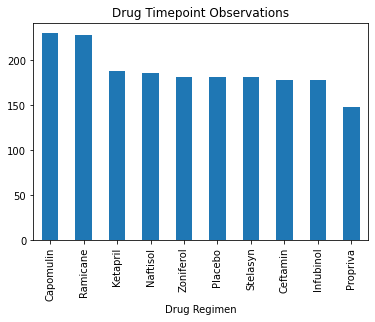

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Timepoint Observations")
plt.show()


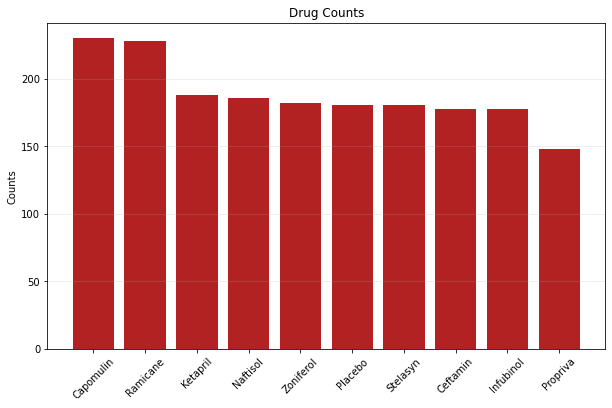

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data = df2.groupby("Drug Regimen").size().sort_values(ascending=False).reset_index()
data.columns = ["Drug Regimen", "Observations"]

plt.figure(figsize=(10,6))

plt.bar(data["Drug Regimen"], data.Observations, color="firebrick")
plt.title("Drug Counts")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.25)

plt.show()


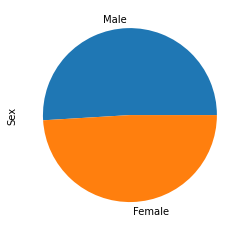

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2.Sex.value_counts().plot(kind="pie")
plt.show()


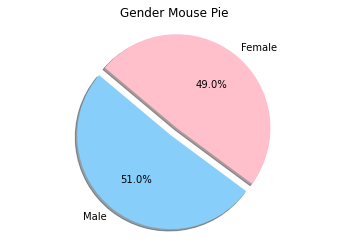

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
summ3 = df2["Sex"].value_counts().reset_index()
summ3.columns = ["Gender", "Count"]

pies = summ3.Gender
pie_votes = summ3["Count"]
colors = ["lightskyblue","pink"]
explode = (0.1,0)



plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Mouse Pie")

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
times = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df3 = pd.merge(df2, times, on=["Mouse ID", "Timepoint"], how="inner")
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [48]:
# Put treatments into a list for for loop (and later for plot labels)


treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []
for drug in treatment:

    tumor_volume = df3.loc[df3 ["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_list.append(tumor_volume) 
# calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


# Determine outliers using upper and lower bounds
    outlier = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    outlier 

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartil

{'whiskers': [<matplotlib.lines.Line2D at 0x22b3e78b790>,
 'caps': [<matplotlib.lines.Line2D at 0x22b3e78bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b3e78b4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x22b3e799310>,
 'fliers': [<matplotlib.lines.Line2D at 0x22b3e7995e0>,
 'means': []}

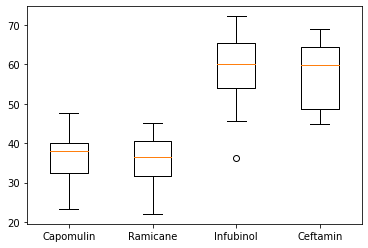

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels= treatment )

## Line and Scatter Plots

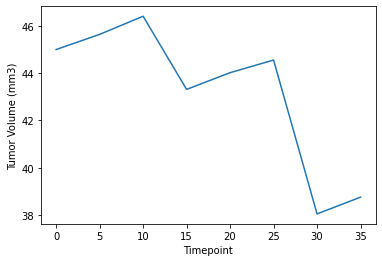

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = df2.loc[df2["Drug Regimen"] == "Capomulin"]

mouse_id = capomulin_mice.loc[df2["Mouse ID"] == "j246"] 
x = mouse_id["Timepoint"] 
y = mouse_id["Tumor Volume (mm3)"] 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y)

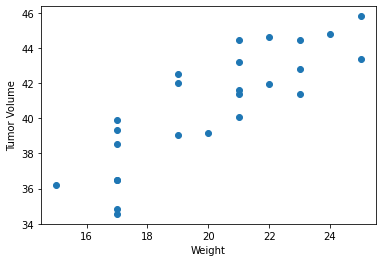

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average = capomulin_mice.groupby("Mouse ID").mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]

plt.scatter(x,y)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [52]:
import seaborn as sns
from scipy import stats as st

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [53]:
data.corr()

,Observations
Observations,1.0


NameError: name 'regress_value' is not defined

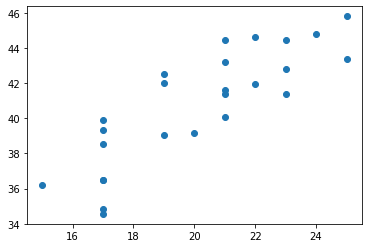

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
corr=round(st.pearsonr(x,y)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()